<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Вакансия: "аналитик данных", парсинг сайта hh.ru в разрезе категорий профессии (junior, middle, senior).

In [1]:
# Загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup 
from selenium import webdriver

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# получение htlm-страницы для работы без библиотеки selenium 
params = {
        'text': 'Аналитик данных',
        'area': {1, 66}, 
        'per_page': 100 ,
        'search_field': 'name'
    }
    
    
req = requests.get('https://api.hh.ru/vacancies', params)

print(req.status_code)

200


In [3]:
# поисковый запрос на сайте hh.ru
URL = 'https://hh.ru/search/vacancy?area=1&area=66&enable_snippets=true&items_on_page=100&search_field=name&text=%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA+%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85'

In [4]:
driver = webdriver.Firefox()

In [5]:
# функция для поиска количества страниц отображения поискового запроса
def find_max_pages():
    driver.get(URL)
    
    html = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    
    paginator = soup.find_all('span', {'class': 'pager-item-not-in-short-range'})
    
    pages = []
    
    for page in paginator:
        pages.append(int(page.find('a').text))
        
    return pages[-1]

In [6]:
# число страниц поискового запроса
max_page = find_max_pages()
print(max_page)

5


In [7]:
# функция для извлечения перечня вакансий
def find_jobs(last_page):
    jobs = []
    for page in range(last_page):
        driver.get(f'{URL}&page={page}')
        html = driver.page_source
        soup = BeautifulSoup(html,'lxml')
        results = soup.find_all('div', {'class':'vacancy-serp-item-body__main-info'})
        
        for result in results:
            jobs.append(result.find('a').text)
            
        
        
    return jobs

In [8]:
# функция для извлечения городов для вакансий
def find_city(last_page):
    city = []
    for page in range(last_page):
        driver.get(f'{URL}&page={page}')
        html = driver.page_source
        soup = BeautifulSoup(html,'lxml')
        results = soup.find_all('div', {'class':'vacancy-serp-item-body__main-info'})
        
        for result in results:
            city.append(result.find(attrs={'data-qa':'vacancy-serp__vacancy-address'}).text)
            
        
        
    return city

In [9]:
# получение списка вакансий
jobs = find_jobs(max_page)

In [10]:
# получение списка городов
cities = find_city(max_page)

In [12]:
# создадим датафрейм из полученных списков вакансий и городов
data = pd.DataFrame({'vacancy' : jobs, 'city': cities})

In [13]:
data.head()

,vacancy,city
0,Senior System Analyst (Исследование данных и AI-трансформация),Москва
1,Senior System Analyst (Исследование данных и AI-трансформация),"Москва, Верхние Котлы"
2,Аналитик данных,Москва
3,Аналитик данных,Москва
4,Аналитик данных,Москва


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vacancy  419 non-null    object
 1   city     419 non-null    object
dtypes: object(2)
memory usage: 6.7+ KB


In [15]:
print(f'Вакансии аналитиков данных в Москве и Нижнем Новгороде представлены в количестве {len(data)} ед.')

Вакансии аналитиков данных в Москве и Нижнем Новгороде представлены в количестве 419 ед.


In [16]:
data['vacancy'].unique()

array(['Senior System Analyst (Исследование данных и AI-трансформация)',
       'Аналитик данных', 'Старший аналитик данных',
       'Аналитик данных/BI аналитик',
       'Бизнес-аналитик \\ Аналитик данных', 'Аналитик данных (витрины)',
       'Ведущий аналитик данных CV', 'Младший аналитик данных',
       'Системный аналитик данных', 'Data аналитик/Аналитик данных',
       'Аналитик данных Excel', 'Аналитик баз данных',
       'Аналитик данных (Senior)', 'Аналитик данных (Big Data)',
       'Аналитик HR данных', 'Data Analyst/Аналитик данных',
       'Ведущий аналитик данных', 'Аналитик данных (Отчетность РБ)',
       'Бизнес-аналитик (Витрины данных)',
       'Геоаналитик / ГИС Аналитик / Аналитик данных',
       'BI аналитик данных Wildberries',
       'Аналитик данных (департамент маркетинга)',
       'BI-разработчик / Аналитик данных',
       'Аналитик (оператор баз данных)',
       'Аналитик данных (SQL разработчик)',
       'Аналитик данных (Ozon Travel)', 'Data analyst / Анали

In [17]:
data['vacancy'].nunique()

288

In [18]:
print(f'Вакансии по поисковому запросу "Аналитик данных" на сайте hh.ru имеют очень разнообразные наименования, количество \
уникальных  названий вакансий составляет {data["vacancy"].nunique()} ед.')

Вакансии по поисковому запросу "Аналитик данных" на сайте hh.ru имеют очень разнообразные наименования, количество уникальных  названий вакансий составляет 288 ед.


In [19]:
data['city'].unique()

array(['Москва', 'Москва, Верхние Котлы',
       'Москва, Марьина Роща и еще\xa01\xa0', 'Москва, Менделеевская',
       'Москва, Савёловская и еще\xa02\xa0',
       'Москва, Добрынинская и еще\xa02\xa0',
       'Москва, Маяковская и еще\xa02\xa0', 'Москва, Павелецкая',
       'Москва, Маяковская', 'Москва, Новокузнецкая и еще\xa02\xa0',
       'Москва, Строгино', 'Москва, Бутырская ',
       'Москва, Деловой центр и еще\xa02\xa0', 'Москва, Выставочная',
       'Москва, Курская', 'Москва, Электрозаводская',
       'Москва, Кутузовская', 'Москва, Тимирязевская',
       'Москва, Пушкинская и еще\xa02\xa0',
       'Москва, Волгоградский проспект',
       'Москва, Покровское и еще\xa03\xa0', 'Нижний Новгород',
       'Москва, Авиамоторная', 'Москва, Автозаводская и еще\xa02\xa0',
       'Москва, Достоевская и еще\xa01\xa0',
       'Москва, Автозаводская и еще\xa01\xa0',
       'Москва, Петровско-Разумовская', 'Москва, Серпуховская',
       'Москва, Улица 1905 года',
       'Москва, Крестьян

In [20]:
data['city'].nunique()

95

In [21]:
print(f'Вакансии по поисковому запросу "Аналитик данных" на сайте hh.ru также имеют {data["city"].nunique()} ед. уникальных \
названий городов, в которых работодателями осуществляется поиск соискателей - за счёт указания не только названий городов, \
но и названий улиц, станций метро и т.д. Приведём данные к отображению только в виде городов.')

Вакансии по поисковому запросу "Аналитик данных" на сайте hh.ru также имеют 95 ед. уникальных названий городов, в которых работодателями осуществляется поиск соискателей - за счёт указания не только названий городов, но и названий улиц, станций метро и т.д. Приведём данные к отображению только в виде городов.


In [22]:
# создадим копию исходного датафрейма для дальнейшей работы и внесения изменений в данные
data2 = data.copy()

In [23]:
# в столбце city оставим только названия городов, удалим названия улиц, станций метро и т.д.
data2['city'] = data2['city'].apply(lambda x: x.split(',')[0])

In [24]:
data2.head()

,vacancy,city
0,Senior System Analyst (Исследование данных и AI-трансформация),Москва
1,Senior System Analyst (Исследование данных и AI-трансформация),Москва
2,Аналитик данных,Москва
3,Аналитик данных,Москва
4,Аналитик данных,Москва


In [25]:
data2['city'].unique()

array(['Москва', 'Нижний Новгород'], dtype=object)

**Уникальные названия городов соответствуют поискову запросу, который осуществлялся по 2-ум городам - Москва и Нижний Новгород.**

**Теперь отсортируем названия вакансий в разрезе категорий Junior, Middle, Senior.**

In [26]:
# подстрока для поска совпадений в категории джуниор
substring_j = r'(?i)(jun|джун|стаж|начинающ|младш|intern)'

In [27]:
# создадим новый столбец jun, в котором будут отображаться найденные совпадения в названиях вакансий по 
#указанной выше подстроке
data2['jun'] = data2.vacancy.str.extract(substring_j, expand = True)

In [28]:
data2['jun'] = data2['jun'].fillna(False)
data2.loc[data2['jun'] != False, 'jun'] = True

In [29]:
data2.query('jun == True')

,vacancy,city,jun
20,Младший аналитик данных,Москва,True
61,Аналитик / Аналитик данных (junior),Москва,True
95,"Стажер/Аналитик данных (Python, Power BI)",Москва,True
137,Младший аналитик данных,Москва,True
198,Junior Analyst / Младший аналитик данных,Москва,True
303,Младший аналитик данных (Hadoop + Spark),Москва,True
347,Младший аналитик данных,Москва,True
354,"Стажер - аналитик данных (Группа разработки ""Аналитика производительности"", Торговая площадка)",Москва,True
382,Стажер (Аналитика больших данных и аудит процессов ИТ),Москва,True
396,Аналитик данных в управлении по управленческому учету и отчетности (стажер),Москва,True


In [30]:
len(data2.query('jun == True'))

10

In [31]:
print(f'Количество вакансий "Аналитик данных" в категории джуниор/junior/стажёр/младший аналитик/начинающий аналитик/intern \
составляет {len(data2.query("jun == True"))} ед., вакансии представлены в городе: {data2.query("jun == True")["city"].unique()}')

Количество вакансий "Аналитик данных" в категории джуниор/junior/стажёр/младший аналитик/начинающий аналитик/intern составляет 10 ед., вакансии представлены в городе: ['Москва']


In [32]:
# подстрока для поска совпадений в категории миддл
substring_m = r'(?i)(mid|мид)'

In [33]:
# создадим новый столбец mid, в котором будут отображаться найденные совпадения в названиях вакансий по 
#указанной выше подстроке
data2['mid'] = data2.vacancy.str.extract(substring_m, expand = True)

In [34]:
data2['mid'] = data2['mid'].fillna(False)
data2.loc[data2['mid'] != False, 'mid'] = True

In [35]:
data2.query('mid == True')

,vacancy,city,jun,mid
57,Аналитик данных (middle / senior) отдел ИРО,Москва,False,True
109,Портфельный аналитик/аналитик данных (middle),Москва,False,True
157,Ведущий аналитик данных (middle),Москва,False,True
182,Аналитик данных / Middle Data Analyst,Москва,False,True
238,Аналитик Данных Middle+/Senior,Москва,False,True
288,Аналитик данных (middle) в команду розничного кредитного конвейера,Москва,False,True
380,"Аналитик данных middle (Управление ""Сквозные бизнес-компоненты"")",Москва,False,True
390,Аналитик данных / Data Scientist (middle+),Москва,False,True
395,Middle Data Analyst/ Аналитик Данных,Москва,False,True


In [36]:
len(data2.query('mid == True'))

9

In [37]:
print(f'Количество вакансий "Аналитик данных" в категории middle/миддл \
составляет {len(data2.query("mid == True"))} ед., вакансии представлены в городе: {data2.query("mid == True")["city"].unique()}')

Количество вакансий "Аналитик данных" в категории middle/миддл составляет 9 ед., вакансии представлены в городе: ['Москва']


In [38]:
# подстрока для поска совпадений в категории сениор
substring_s = r'(?i)(sen|сен|син|ведущ|старш|главн|руковод)'

In [39]:
# создадим новый столбец sen, в котором будут отображаться найденные совпадения в названиях вакансий 
#по указанной выше подстроке
data2['sen'] = data2.vacancy.str.extract(substring_s, expand = True)

In [40]:
data2['sen'] = data2['sen'].fillna(False)
data2.loc[data2['sen'] != False, 'sen'] = True

In [41]:
data2.query('sen == True')

,vacancy,city,jun,mid,sen
0,Senior System Analyst (Исследование данных и AI-трансформация),Москва,False,False,True
1,Senior System Analyst (Исследование данных и AI-трансформация),Москва,False,False,True
7,Старший аналитик данных,Москва,False,False,True
19,Ведущий аналитик данных CV,Москва,False,False,True
25,Аналитик данных (Senior),Москва,False,False,True
29,Ведущий аналитик данных,Москва,False,False,True
55,Senior Analyst /Аналитик данных,Москва,False,False,True
57,Аналитик данных (middle / senior) отдел ИРО,Москва,False,True,True
78,Ведущий аналитик качества данных,Москва,False,False,True
108,Руководитель отдела анализа данных/Lead Data Analyst,Москва,False,False,True


In [42]:
len(data2.query('sen == True'))

56

In [43]:
print(f'Количество вакансий "Аналитик данных" в категории senior/сениор/ведущий аналитик/старший аналитик/главный аналитик/руководитель \
составляет {len(data2.query("sen == True"))} ед., вакансии представлены в городе: {data2.query("sen == True")["city"].unique()}. \
Также следует отметить, что по нескольким вакансиям есть пересечения между middle/senior, т.к. в размещённой вакансии \
работодатель указал такие условия.')

Количество вакансий "Аналитик данных" в категории senior/сениор/ведущий аналитик/старший аналитик/главный аналитик/руководитель составляет 56 ед., вакансии представлены в городе: ['Москва']. Также следует отметить, что по нескольким вакансиям есть пересечения между middle/senior, т.к. в размещённой вакансии работодатель указал такие условия.


In [44]:
# создадим новый столбец not_specified, в котором будут отображаться вакансии, которые не имеют совпадений 
#по подстрокам в разрезе категорий джуниор/миддл/сениор
data2['not_spec'] = False

In [45]:
data2.loc[(data2['jun'] == False)&(data2['mid'] == False)&(data2['sen'] == False), 'not_spec'] = True

In [46]:
data2.query('not_spec == True').head(15)

,vacancy,city,jun,mid,sen,not_spec
2,Аналитик данных,Москва,False,False,False,True
3,Аналитик данных,Москва,False,False,False,True
4,Аналитик данных,Москва,False,False,False,True
5,Аналитик данных,Москва,False,False,False,True
6,Аналитик данных,Москва,False,False,False,True
8,Аналитик данных,Москва,False,False,False,True
9,Аналитик данных,Москва,False,False,False,True
10,Аналитик данных/BI аналитик,Москва,False,False,False,True
11,Аналитик данных,Москва,False,False,False,True
12,Аналитик данных,Москва,False,False,False,True


In [47]:
len(data2.query('not_spec == True'))

347

In [48]:
print(f'Количество вакансий "Аналитик данных" без указания категорий junior/middle/senior \
составляет {len(data2.query("not_spec == True"))} ед., что в процентном отношении = {int(len(data2.query("not_spec == True")) / len(data2) * 100)}% \
от всего объёма данных {len(data2)} вакансий. Данные вакансии (без категории) представлены в городе: {data2.query("not_spec == True")["city"].unique()}.')

Количество вакансий "Аналитик данных" без указания категорий junior/middle/senior составляет 347 ед., что в процентном отношении = 82% от всего объёма данных 419 вакансий. Данные вакансии (без категории) представлены в городе: ['Москва' 'Нижний Новгород'].


In [49]:
# создадим сводную таблицу, в которой в разрезе городов будут отображаться категории вакансий
pivot = data2.groupby('city').agg({'jun': 'sum', 'mid':'sum', 'sen':'sum', 'not_spec':'sum'}).reset_index()

In [50]:
pivot

,city,jun,mid,sen,not_spec
0,Москва,10,9,56,338
1,Нижний Новгород,0,0,0,9


<Figure size 1200x800 with 0 Axes>

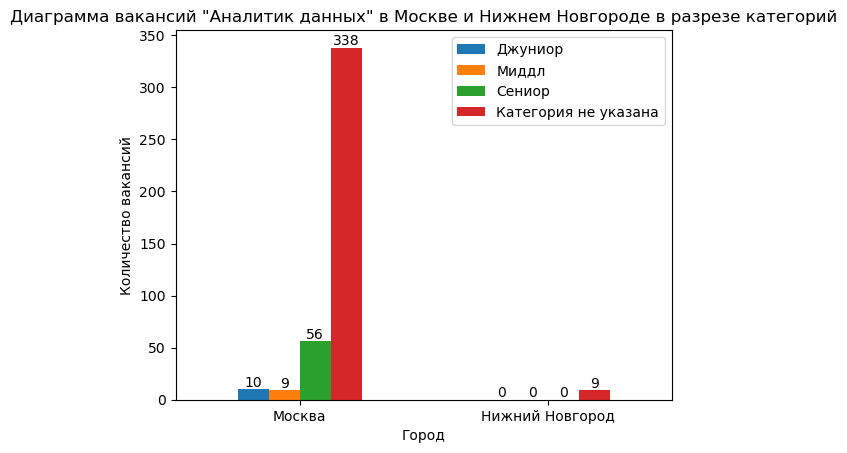

In [51]:
plt.figure(figsize=(12,8))
ax = pivot.plot(x='city', kind='bar', stacked=False)
plt.title('Диаграмма вакансий "Аналитик данных" в Москве и Нижнем Новгороде в разрезе категорий')
plt.xticks(rotation=360)
plt.ylabel('Количество вакансий')
plt.xlabel('Город')
plt.legend(title= None, labels=['Джуниор', 'Миддл', 'Сениор', 'Категория не указана'])

for container in ax.containers :
    ax.bar_label (container) 

plt.show()

In [52]:
print(f'Количество вакансий по специальности "Аналитик данных" в городах Москве и Нижнем Новгороде составило {len(data)} шт. Основное число вакансий - \
{int(pivot[["jun", "mid", "sen", "not_spec"]].sum(axis=1)[0]/len(data)*100)} % опубликовано для Москвы в количестве {int(pivot[["jun", "mid", "sen", "not_spec"]].sum(axis=1)[0])} единиц, \
из которых вакансий с категорией джуниор размещено {int(pivot[["jun"]].sum(axis=1)[0])} шт., вакансий с категорией миддл размещено \
{int(pivot[["mid"]].sum(axis=1)[0])} шт., вакансий с категорией сениор {int(pivot[["sen"]].sum(axis=1)[0])} шт., и вакансий с неуказанной категорией \
{int(pivot[["not_spec"]].sum(axis=1)[0])} шт. На Нижний Новгород пришлось всего {int(pivot[["jun", "mid", "sen", "not_spec"]].sum(axis=1)[1])} вакансий, что составляет \
{100 - int(pivot[["jun", "mid", "sen", "not_spec"]].sum(axis=1)[0] / len(data) * 100)}% от объёма данных.')

Количество вакансий по специальности "Аналитик данных" в городах Москве и Нижнем Новгороде составило 419 шт. Основное число вакансий - 98 % опубликовано для Москвы в количестве 413 единиц, из которых вакансий с категорией джуниор размещено 10 шт., вакансий с категорией миддл размещено 9 шт., вакансий с категорией сениор 56 шт., и вакансий с неуказанной категорией 338 шт. На Нижний Новгород пришлось всего 9 вакансий, что составляет 2% от объёма данных.


# Вакансия: "data scientist", парсинг сайта hh.ru в разрезе категорий профессии (junior, middle, senior).

In [53]:
# получение htlm-страницы для работы без библиотеки selenium 
params = {
        'text': 'Data scientist',
        'area': {1, 66}, 
        'per_page': 50,
        'search_field': 'name'
    }
    
    
req = requests.get('https://api.hh.ru/vacancies', params)

print(req.status_code)

200


In [54]:
URL = 'https://hh.ru/search/vacancy?area=1&area=66&enable_snippets=true&items_on_page=50&search_field=name&text=Data+scientist'

**Воспользуемся функциями, указанными выше - find_max_pages(), find_jobs(last_page), find_city(last_page).**

In [55]:
# число страниц поискового запроса
max_page_ds = find_max_pages()
print(max_page_ds)

5


In [56]:
# получение списка вакансий
jobs_ds = find_jobs(max_page_ds)

In [57]:
# получение списка городов
cities_ds = find_city(max_page_ds)

In [58]:
# создадим датафрейм из полученных списков вакансий и городов
data_ds = pd.DataFrame({'vacancy' : jobs_ds, 'city': cities_ds})

In [59]:
data_ds.head()

,vacancy,city
0,Data Scientist в Trust & Safety,"Москва, Алексеевская"
1,Data Scientist,Москва
2,Data Scientist (команда Поиска),"Москва, Алексеевская"
3,Data Scientist в b2c направление,"Москва, Алексеевская"
4,Data scientist,Москва


In [60]:
data_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vacancy  236 non-null    object
 1   city     236 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [61]:
print(f'Вакансии Data scientist в Москве и Нижнем Новгороде представлены в количестве {len(data_ds)} ед.')

Вакансии Data scientist в Москве и Нижнем Новгороде представлены в количестве 236 ед.


In [62]:
data_ds['vacancy'].unique()

array(['Data Scientist в Trust & Safety', 'Data Scientist',
       'Data Scientist (команда Поиска)',
       'Data Scientist в b2c направление', 'Data scientist',
       'Data Scientist \\ Data Analyst', 'Data Scientist (NLP)',
       'Junior Data Scientist', 'Senior Data Scientist',
       'Data engineer / Data Scientist / Data Analyst',
       'Стажер Data Scientist', 'Middle/Senior Data Scientist',
       'Data Scientist – Senior', 'Data Scientist NLP (Global markets)',
       'Data Scientist (математическое моделирование)',
       'Data scientist (кредитный скоринг)',
       'Computer vision engineer / data scientist',
       'Data Scientist (NLP, NER)', 'Data scientist (модели оптимизации)',
       'Data scientist (команда Collection)',
       'Data Scientist LLM (Global markets)',
       'Senior Data Scientist (проект Customer Value Management)',
       'Data Scientist [eSports]', 'Middle / Senior Data Scientist',
       'Data Scientist (команда Content)',
       'Middle Data Ana

In [63]:
data_ds['vacancy'].nunique()

171

In [64]:
print(f'Вакансии по поисковому запросу "Data scientist" на сайте hh.ru имеют очень разнообразные наименования, количество \
уникальных  названий вакансий составляет {data_ds["vacancy"].nunique()} ед.')

Вакансии по поисковому запросу "Data scientist" на сайте hh.ru имеют очень разнообразные наименования, количество уникальных  названий вакансий составляет 171 ед.


In [65]:
data_ds['city'].unique()

array(['Москва, Алексеевская', 'Москва',
       'Москва, Павелецкая и еще\xa02\xa0', 'Москва, Сокольники',
       'Москва, Окружная и еще\xa03\xa0',
       'Москва, Покровское и еще\xa03\xa0', 'Москва, Выставочная',
       'Москва, Добрынинская', 'Нижний Новгород', 'Москва, Кутузовская',
       'Москва, Новокузнецкая', 'Москва, Улица 1905 года',
       'Москва, Шаболовская', 'Москва, Водный стадион',
       'Москва, Зорге и еще\xa02\xa0', 'Москва, Кунцевская',
       'Москва, Кутузовская и еще\xa01\xa0',
       'Москва, Выставочная и еще\xa02\xa0',
       'Москва, Парк культуры и еще\xa02\xa0', 'Москва, Октябрьская',
       'Москва, Проспект Мира и еще\xa02\xa0', 'Москва, Павелецкая',
       'Москва, Деловой центр и еще\xa02\xa0',
       'Москва, Баррикадная и еще\xa02\xa0',
       'Москва, Динамо и еще\xa01\xa0', 'Москва, Технопарк',
       'Москва, Белорусская', 'Москва, Киевская и еще\xa03\xa0',
       'Москва, Аэропорт', 'Москва, Полежаевская и еще\xa01\xa0',
       'Москва, Спорти

In [66]:
data_ds['city'].nunique()

35

In [67]:
print(f'Вакансии по поисковому запросу "Data scientist" на сайте hh.ru также имеют {data_ds["city"].nunique()} ед. уникальных \
названий городов, в которых работодателями осуществляется поиск соискателей - за счёт указания не только названий городов, \
но и названий улиц, станций метро и т.д. Приведём данные к отображению только в виде городов.')

Вакансии по поисковому запросу "Data scientist" на сайте hh.ru также имеют 35 ед. уникальных названий городов, в которых работодателями осуществляется поиск соискателей - за счёт указания не только названий городов, но и названий улиц, станций метро и т.д. Приведём данные к отображению только в виде городов.


In [68]:
# создадим копию исходного датафрейма для дальнейшей работы и внесения изменений в данные
data_ds2 = data_ds.copy()

In [69]:
# в столбце city оставим только названия городов, удалим названия улиц, станций метро и т.д.
data_ds2['city'] = data_ds2['city'].apply(lambda x: x.split(',')[0])

In [70]:
data_ds2.head()

,vacancy,city
0,Data Scientist в Trust & Safety,Москва
1,Data Scientist,Москва
2,Data Scientist (команда Поиска),Москва
3,Data Scientist в b2c направление,Москва
4,Data scientist,Москва


In [71]:
data_ds2['city'].unique()

array(['Москва', 'Нижний Новгород'], dtype=object)

**Уникальные названия городов соответствуют поискову запросу, который осуществлялся по 2-ум городам - Москва и Нижний Новгород.**.

**Теперь отсортируем названия вакансий в разрезе категорий Junior, Middle, Senior.**

**Подстроки для поиска указанных категорий приведены выше - при работе с вакансией аналитик данных. Воспользуемся уже заданными переменными (substring_j, substring_m. substring_s).**

In [72]:
# создадим новый столбец jun, в котором будут отображаться найденные совпадения в названиях вакансий 
#по указанной выше подстроке
data_ds2['jun'] = data_ds2.vacancy.str.extract(substring_j, expand = True)

In [73]:
data_ds2['jun'] = data_ds2['jun'].fillna(False)
data_ds2.loc[data_ds2['jun'] != False, 'jun'] = True

In [74]:
data_ds2.query('jun == True')

,vacancy,city,jun
10,Junior Data Scientist,Москва,True
13,Стажер Data Scientist,Москва,True
33,Middle / Junior Data Scientist,Москва,True
48,Junior Data Scientist,Москва,True
134,Junior Data scientist,Москва,True
161,Junior Data Scientist,Москва,True
186,Intern Data Scientist,Москва,True
217,Junior Data Scientist (сопровождение процесса разработки и использования моделей),Москва,True
223,Экономист-аналитик (junior data scientist),Москва,True


In [75]:
len(data_ds2.query('jun == True'))

9

In [76]:
print(f'Количество вакансий "Data scientist" в категории джуниор/junior/стажёр/младший аналитик/начинающий аналитик/intern \
составляет {len(data_ds2.query("jun == True"))} ед., вакансии представлены в городе: {data_ds2.query("jun == True")["city"].unique()}')

Количество вакансий "Data scientist" в категории джуниор/junior/стажёр/младший аналитик/начинающий аналитик/intern составляет 9 ед., вакансии представлены в городе: ['Москва']


In [77]:
# создадим новый столбец mid, в котором будут отображаться найденные совпадения в названиях вакансий 
#по указанной выше подстроке
data_ds2['mid'] = data_ds2.vacancy.str.extract(substring_m, expand = True)

In [78]:
data_ds2['mid'] = data_ds2['mid'].fillna(False)
data_ds2.loc[data_ds2['mid'] != False, 'mid'] = True

In [79]:
data_ds2.query('mid == True')

,vacancy,city,jun,mid
14,Middle/Senior Data Scientist,Москва,False,True
29,Middle / Senior Data Scientist,Москва,False,True
32,Middle Data Analyst / Data Scientist,Москва,False,True
33,Middle / Junior Data Scientist,Москва,True,True
35,Data Scientist (NLP) Middle+,Нижний Новгород,False,True
56,Data scientist NLP (middle),Москва,False,True
57,Middle Data Scientist CV (Быстрая доставка),Москва,False,True
60,Data Scientist (Middle),Москва,False,True
70,Middle/Senior Data Scientist,Москва,False,True
83,Data Scientist middle,Москва,False,True


In [80]:
len(data_ds2.query('mid == True'))

33

In [81]:
print(f'Количество вакансий "Data scientist" в категории middle/миддл \
составляет {len(data_ds2.query("mid == True"))} ед., вакансии представлены в городе: {data_ds2.query("mid == True")["city"].unique()}')

Количество вакансий "Data scientist" в категории middle/миддл составляет 33 ед., вакансии представлены в городе: ['Москва' 'Нижний Новгород']


In [82]:
# создадим новый столбец sen, в котором будут отображаться найденные совпадения в названиях вакансий 
#по указанной выше подстроке
data_ds2['sen'] = data_ds2.vacancy.str.extract(substring_s, expand = True)

In [83]:
data_ds2['sen'] = data_ds2['sen'].fillna(False)
data_ds2.loc[data_ds2['sen'] != False, 'sen'] = True

In [84]:
data_ds2.query('sen == True').head(15)

,vacancy,city,jun,mid,sen
11,Senior Data Scientist,Москва,False,False,True
14,Middle/Senior Data Scientist,Москва,False,True,True
15,Data Scientist – Senior,Москва,False,False,True
25,Senior Data Scientist (проект Customer Value Management),Москва,False,False,True
29,Middle / Senior Data Scientist,Москва,False,True,True
39,Senior Data scientist (Deep Learning),Москва,False,False,True
40,Senior Data scientist (кредитный скоринг),Москва,False,False,True
46,"Data Scientist Senior, Remote",Москва,False,False,True
51,Senior Data Scientist (ML-engineer),Москва,False,False,True
52,Senior Data Scientist,Москва,False,False,True


In [85]:
len(data_ds2.query('sen == True'))

69

In [86]:
print(f'Количество вакансий "Data scientist" в категории senior/сениор/ведущий аналитик/старший аналитик/главный аналитик/руководитель \
составляет {len(data_ds2.query("sen == True"))} ед., вакансии представлены в городе: {data_ds2.query("sen == True")["city"].unique()}. \
Также следует отметить, что по некоторым вакансиям есть пересечения между middle/senior, т.к. в размещённой вакансии \
работодатель указал такие условия.')

Количество вакансий "Data scientist" в категории senior/сениор/ведущий аналитик/старший аналитик/главный аналитик/руководитель составляет 69 ед., вакансии представлены в городе: ['Москва' 'Нижний Новгород']. Также следует отметить, что по некоторым вакансиям есть пересечения между middle/senior, т.к. в размещённой вакансии работодатель указал такие условия.


In [87]:
# создадим новый столбец not_specified, в котором будут отображаться вакансии, которые не имеют совпадений 
#по подстрокам в разрезе категорий джуниор/миддл/сениор
data_ds2['not_spec'] = False

In [88]:
data_ds2.loc[(data_ds2['jun'] == False)&(data_ds2['mid'] == False)&(data_ds2['sen'] == False), 'not_spec'] = True

In [89]:
data_ds2.query('not_spec == True').head(15)

,vacancy,city,jun,mid,sen,not_spec
0,Data Scientist в Trust & Safety,Москва,False,False,False,True
1,Data Scientist,Москва,False,False,False,True
2,Data Scientist (команда Поиска),Москва,False,False,False,True
3,Data Scientist в b2c направление,Москва,False,False,False,True
4,Data scientist,Москва,False,False,False,True
5,Data Scientist,Москва,False,False,False,True
6,Data Scientist \ Data Analyst,Москва,False,False,False,True
7,Data scientist,Москва,False,False,False,True
8,Data Scientist (NLP),Москва,False,False,False,True
9,Data Scientist,Москва,False,False,False,True


In [90]:
len(data_ds2.query('not_spec == True'))

141

In [91]:
print(f'Количество вакансий "Data scientist" без указания категорий junior/middle/senior \
составляет {len(data_ds2.query("not_spec == True"))} ед., что в процентном отношении = {int(len(data_ds2.query("not_spec == True")) / len(data_ds2) * 100)}% \
от всего объёма данных {len(data_ds2)} вакансий. Данные вакансии (без категории) представлены в городе: {data_ds2.query("not_spec == True")["city"].unique()}.')

Количество вакансий "Data scientist" без указания категорий junior/middle/senior составляет 141 ед., что в процентном отношении = 59% от всего объёма данных 236 вакансий. Данные вакансии (без категории) представлены в городе: ['Москва' 'Нижний Новгород'].


In [92]:
# создадим сводную таблицу, в которой в разрезе городов будут отображаться категории вакансий
pivot_ds = data_ds2.groupby('city').agg({'jun': 'sum', 'mid':'sum', 'sen':'sum', 'not_spec':'sum'}).reset_index()

In [93]:
pivot_ds

,city,jun,mid,sen,not_spec
0,Москва,9,32,68,137
1,Нижний Новгород,0,1,1,4


<Figure size 1200x800 with 0 Axes>

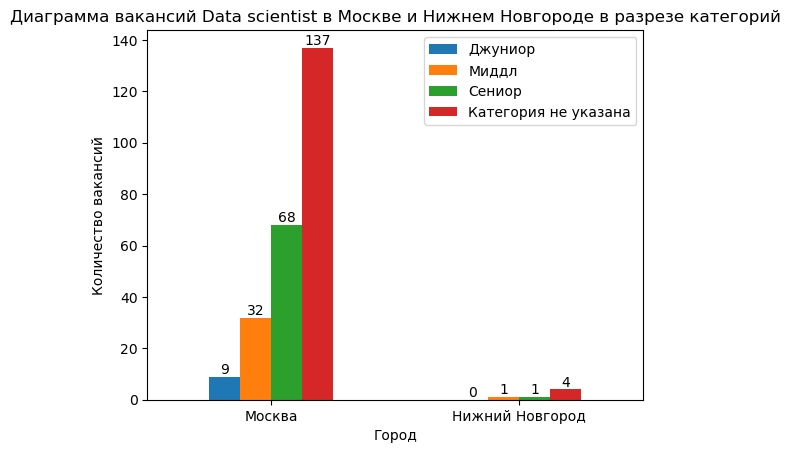

In [94]:
plt.figure(figsize=(12,8))
ax = pivot_ds.plot(x='city', kind='bar', stacked=False)
plt.title('Диаграмма вакансий Data scientist в Москве и Нижнем Новгороде в разрезе категорий')
plt.xticks(rotation=360)
plt.ylabel('Количество вакансий')
plt.xlabel('Город')
plt.legend(title= None, labels=['Джуниор', 'Миддл', 'Сениор', 'Категория не указана'])

for container in ax.containers :
    ax.bar_label (container) 

plt.show()

In [95]:
# вакансии для Москвы
m = len(data_ds2.query("city == '''Москва'''"))/len(data_ds)*100
lenm = len(data_ds2.query("city == '''Москва'''"))

In [96]:
print(f'Количество вакансий по специальности "Data scientist" в городах Москве и Нижнем Новгороде составило {len(data_ds)} шт. Основное число вакансий - \
{int(m)} % опубликовано для Москвы в количестве {int(lenm)} единиц, \
из которых вакансий с категорией джуниор размещено {int(pivot_ds[["jun"]].sum(axis=1)[0])} шт., вакансий с категорией миддл размещено \
{int(pivot_ds[["mid"]].sum(axis=1)[0])} шт., вакансий с категорией сениор {int(pivot_ds[["sen"]].sum(axis=1)[0])} шт., и вакансий с неуказанной категорией \
{int(pivot_ds[["not_spec"]].sum(axis=1)[0])} шт. Следует отметить, что есть пересечение по вакансиям в категориях middle и senior. На Нижний Новгород пришлось всего {int(pivot_ds[["jun", "mid", "sen", "not_spec"]].sum(axis=1)[1])} \
вакансий, что составляет {100 - int(pivot_ds[["jun", "mid", "sen", "not_spec"]].sum(axis=1)[0] / len(data_ds) * 100)} % от объёма данных.')

Количество вакансий по специальности "Data scientist" в городах Москве и Нижнем Новгороде составило 236 шт. Основное число вакансий - 97 % опубликовано для Москвы в количестве 230 единиц, из которых вакансий с категорией джуниор размещено 9 шт., вакансий с категорией миддл размещено 32 шт., вакансий с категорией сениор 68 шт., и вакансий с неуказанной категорией 137 шт. Следует отметить, что есть пересечение по вакансиям в категориях middle и senior. На Нижний Новгород пришлось всего 6 вакансий, что составляет -4 % от объёма данных.
